# Notebook Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import numpy as np
import matplotlib.pyplot as plt

import os
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit


import gvar as gv



import correlatoranalyser as CA

In [2]:
#paths for the coarse lattice - new_dataset
p3fold = os.environ['mount_point_path_newdataset'] + "48c48/binned20250430_hmz370_BMW_3.31_48c48_ml-0.09933_mh-0.04_connected_himom//3PointCorrelation/"
p2fold = os.environ['mount_point_path_newdataset'] + "48c48/binned20250430_hmz370_BMW_3.31_48c48_ml-0.09933_mh-0.04_connected_himom/2PointCorrelation/"


# coarse lattice - P = -2
opAnalyzer = moments_toolkit(p3fold, p2fold,
                                            skip3p=False, skipop=False,
                                            verbose=True,
                                            fast_data_folder = "../fast_data_2DERdataset_p2",
                                            operator_folder= "../operator_database",
                                            momentum='PX2_PY2_PZ2',
                                            insertion_momentum = 'qx0_qy0_qz0',
                                            smearing_index=1,
                                            tag_2p='hspectrum',
                                            max_n=3
                                            )

# p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/3PointCorrelation/"
# p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/2PointCorrelation/"

# opAnalyzer = moments_toolkit(p3fold, p2fold,
#                             skip3p=False, skipop=False,
#                             verbose=True,
#                             fast_data_folder = "../fast_data_extended_px-2_q0",
#                             operator_folder= "../operator_database",
#                             momentum='PX-2_PY0_PZ0',
#                             insertion_momentum = 'qx0_qy0_qz0',
#                             tag_2p='hspectrum',
#                             max_n=3
#                             )


Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...


Reading the 2 point and 3 point correlators from the fast access dataset ...


Reading the list of all the available operators from the database...


Class Initialization Complete!



## Irrep Decomposition Analysis

In [3]:
#1 derivative case
opAnalyzer.decomposition_analysis('V',1)
opAnalyzer.decomposition_analysis('A',1)
opAnalyzer.decomposition_analysis('T',1)


Analysis of the irreps in the tensor decomposition (4, 1) x (4, 1) :

| Irrep   | Mixing Safe   |   Multiplicity | Symmetry   |
|:--------|:--------------|---------------:|:-----------|
| (1, 1)  | N             |              1 | S          |
| (3, 1)  | Y             |              1 | S          |
| (6, 1)  | N             |              1 | A          |
| (6, 3)  | Y             |              1 | S          |

Analysis of the irreps in the tensor decomposition (4, 4) x (4, 1) :

| Irrep   | Mixing Safe   |   Multiplicity | Symmetry   |
|:--------|:--------------|---------------:|:-----------|
| (1, 4)  | N             |              1 | S          |
| (3, 4)  | Y             |              1 | S          |
| (6, 1)  | N             |              1 | A          |
| (6, 4)  | Y             |              1 | S          |

Analysis of the irreps in the tensor decomposition (6, 1) x (4, 1) :

| Irrep   | Mixing Safe   |   Multiplicity |
|:--------|:--------------|---------------:|
|

In [4]:
opAnalyzer.decomposition_analysis('V',2)


Analysis of the irreps in the tensor decomposition (4, 1) x (4, 1) x (4, 1) :

| Irrep   | Mixing Safe   |   Multiplicity | Symmetry   |
|:--------|:--------------|---------------:|:-----------|
| (4, 1)  | N             |              4 | -          |
| (4, 2)  | Y             |              1 | S          |
| (4, 4)  | N             |              1 | A          |
| (8, 1)  | N             |              3 | -          |
| (8, 2)  | N             |              2 | -          |


In [5]:
opAnalyzer.decomposition_analysis('A',2)


Analysis of the irreps in the tensor decomposition (4, 4) x (4, 1) x (4, 1) :

| Irrep   | Mixing Safe   |   Multiplicity | Symmetry   |
|:--------|:--------------|---------------:|:-----------|
| (4, 1)  | N             |              1 | A          |
| (4, 3)  | Y             |              1 | S          |
| (4, 4)  | N             |              4 | -          |
| (8, 1)  | N             |              2 | -          |
| (8, 2)  | N             |              3 | -          |


In [6]:
opAnalyzer.decomposition_analysis('T',2)


Analysis of the irreps in the tensor decomposition (6, 1) x (4, 1) x (4, 1) :

| Irrep   | Mixing Safe   |   Multiplicity |
|:--------|:--------------|---------------:|
| (1, 1)  | N             |              1 |
| (1, 4)  | N             |              1 |
| (2, 1)  | Y             |              1 |
| (2, 2)  | Y             |              1 |
| (3, 1)  | N             |              2 |
| (3, 2)  | Y             |              1 |
| (3, 3)  | Y             |              1 |
| (3, 4)  | N             |              2 |
| (6, 1)  | N             |              4 |
| (6, 2)  | Y             |              2 |
| (6, 3)  | N             |              3 |
| (6, 4)  | N             |              3 |


## Operators Choice

In [7]:
#vector - irrep (4,2)
opV1 = opAnalyzer.get_operator(113)
opV2 = opAnalyzer.get_operator(114)
opV3 = opAnalyzer.get_operator(115)
opV4 = opAnalyzer.get_operator(116)


#axial - irrep (4,3)
opA1 = opAnalyzer.get_operator(165)
opA2 = opAnalyzer.get_operator(166)
opA3 = opAnalyzer.get_operator(167)
opA4 = opAnalyzer.get_operator(168)

#tensor - irrep (3,2)
opT1 = opAnalyzer.get_operator(262) - opAnalyzer.get_operator(268)
opT2 = opAnalyzer.get_operator(263) - opAnalyzer.get_operator(269)
#opTextra = opAnalyzer.get_operator(264) + opAnalyzer.get_operator(270)

#tensor - irrep (3,3)
opT3 = opAnalyzer.get_operator(271) + opAnalyzer.get_operator(274)
opT4 = opAnalyzer.get_operator(272) + opAnalyzer.get_operator(275)

# #we empty the list of operators in the class
# opAnalyzer.deselect_operator()

# #we append the operators
# opAnalyzer.append_operator(opV1)
# opAnalyzer.append_operator(opV2)
# opAnalyzer.append_operator(opV3)
# opAnalyzer.append_operator(opV4)
# opAnalyzer.append_operator(opA1)
# opAnalyzer.append_operator(opA2)
# opAnalyzer.append_operator(opA3)
# opAnalyzer.append_operator(opA4)
# opAnalyzer.append_operator(opT1)
# opAnalyzer.append_operator(opT2)
# opAnalyzer.append_operator(opT3)
# opAnalyzer.append_operator(opT4)

opAnalyzer.focus_2der_operators()

#we show the operators
opAnalyzer.display_operators()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
opT_3_2_list = [opT1,opT2] #,opTextra]
for op in opT_3_2_list:
    op.display()
    op.K
    op.C
    op.symm
    "####"

<IPython.core.display.Math object>

4*I*p_3*(p_1**2 - p_2**2)/E(p)

-1

'Symmetric'

'####'

<IPython.core.display.Math object>

4*I*p_3*(4*E(p)*p_1**2 - 4*E(p)*p_2**2 + m_N*p_1**2 - m_N*p_2**2)/(E(p)*(E(p) + m_N))

-1

'Symmetric'

'####'

In [9]:
opT_3_3_list = [opT3,opT4]
for op in opT_3_3_list:
    op.display()
    op.K
    op.C
    op.symm
    "####"

<IPython.core.display.Math object>

4*p_1*p_2*(-E(p)*m_N - m_N**2 - p_1**2 - p_2**2 + 2*p_3**2)/(E(p)*(E(p) + m_N))

-1

'Symmetric'

'####'

<IPython.core.display.Math object>

-16*p_1*p_2

-1

'Symmetric'

'####'

In [10]:
opAnalyzer.remove_zeroK_operators()
opAnalyzer.display_operators()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# First Plots

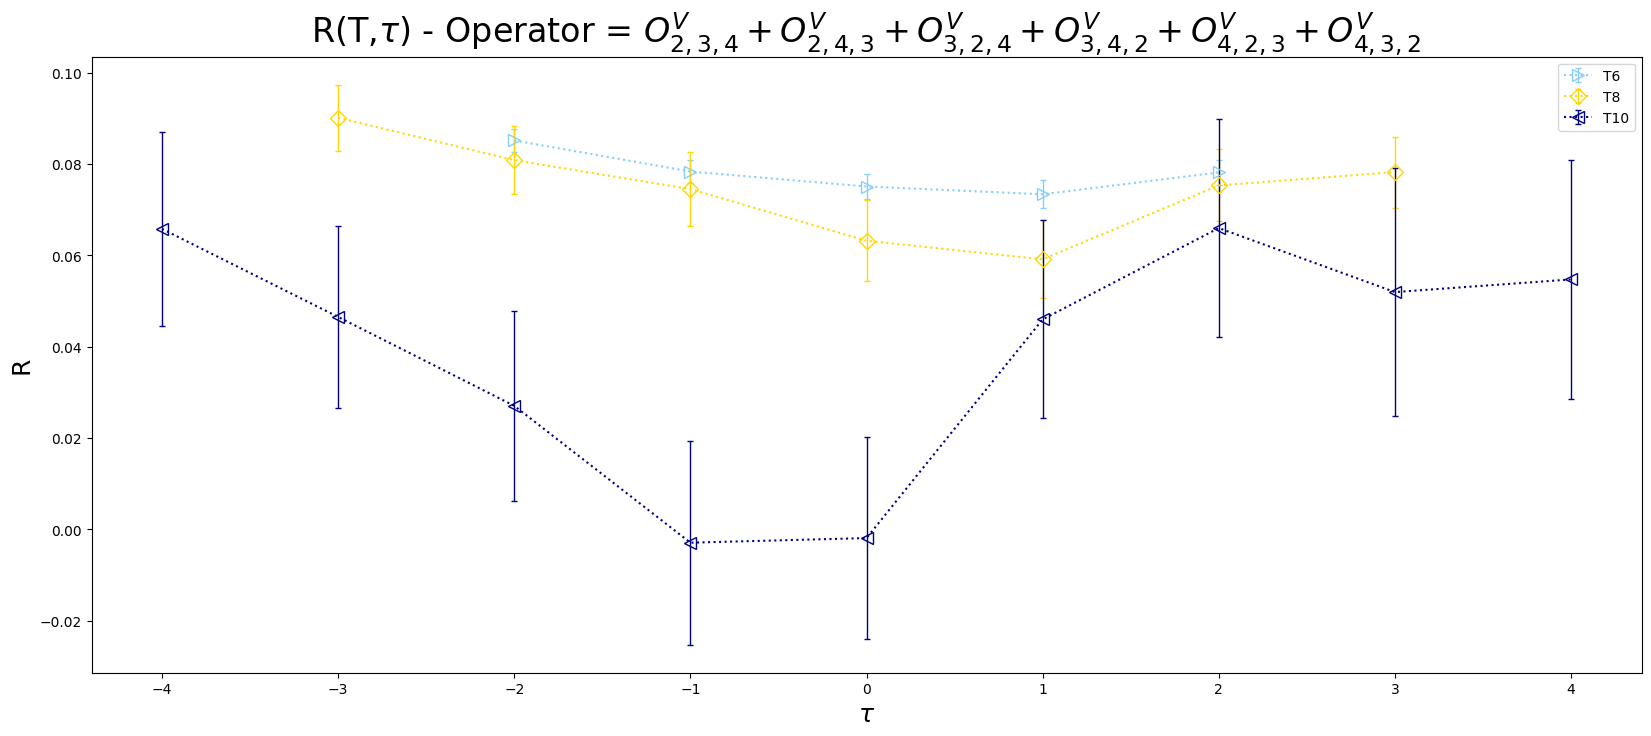

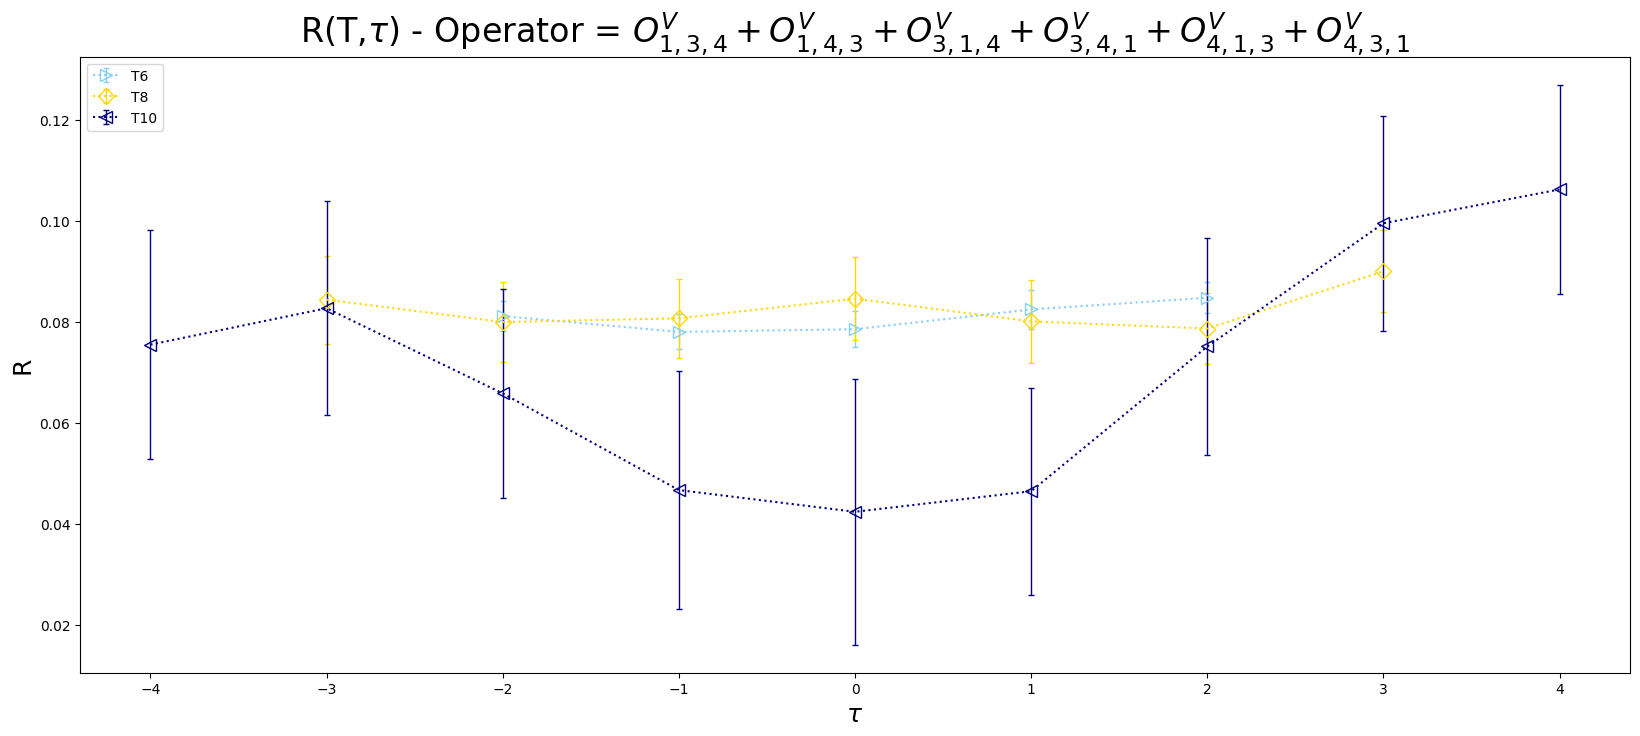

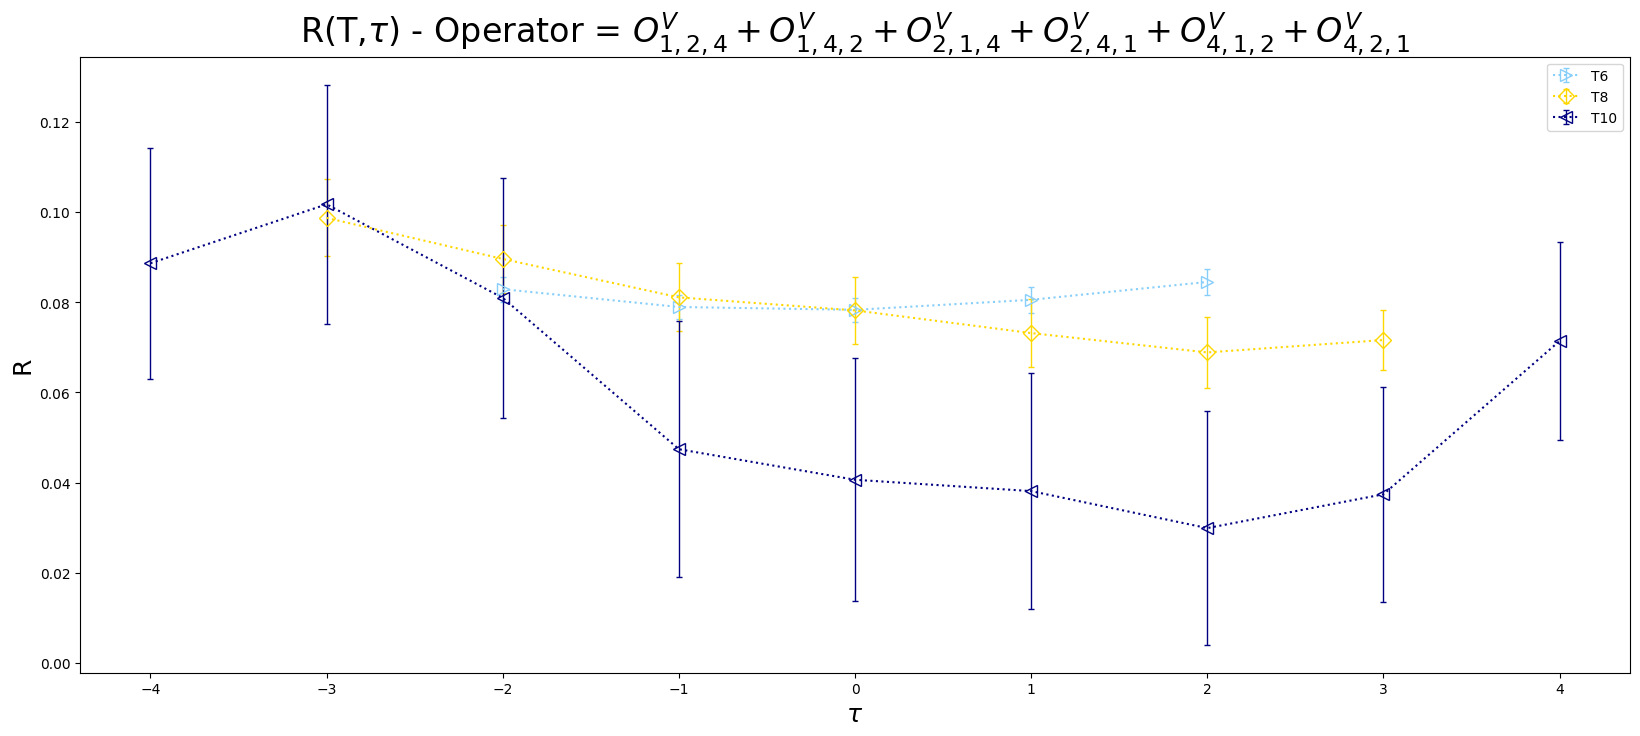

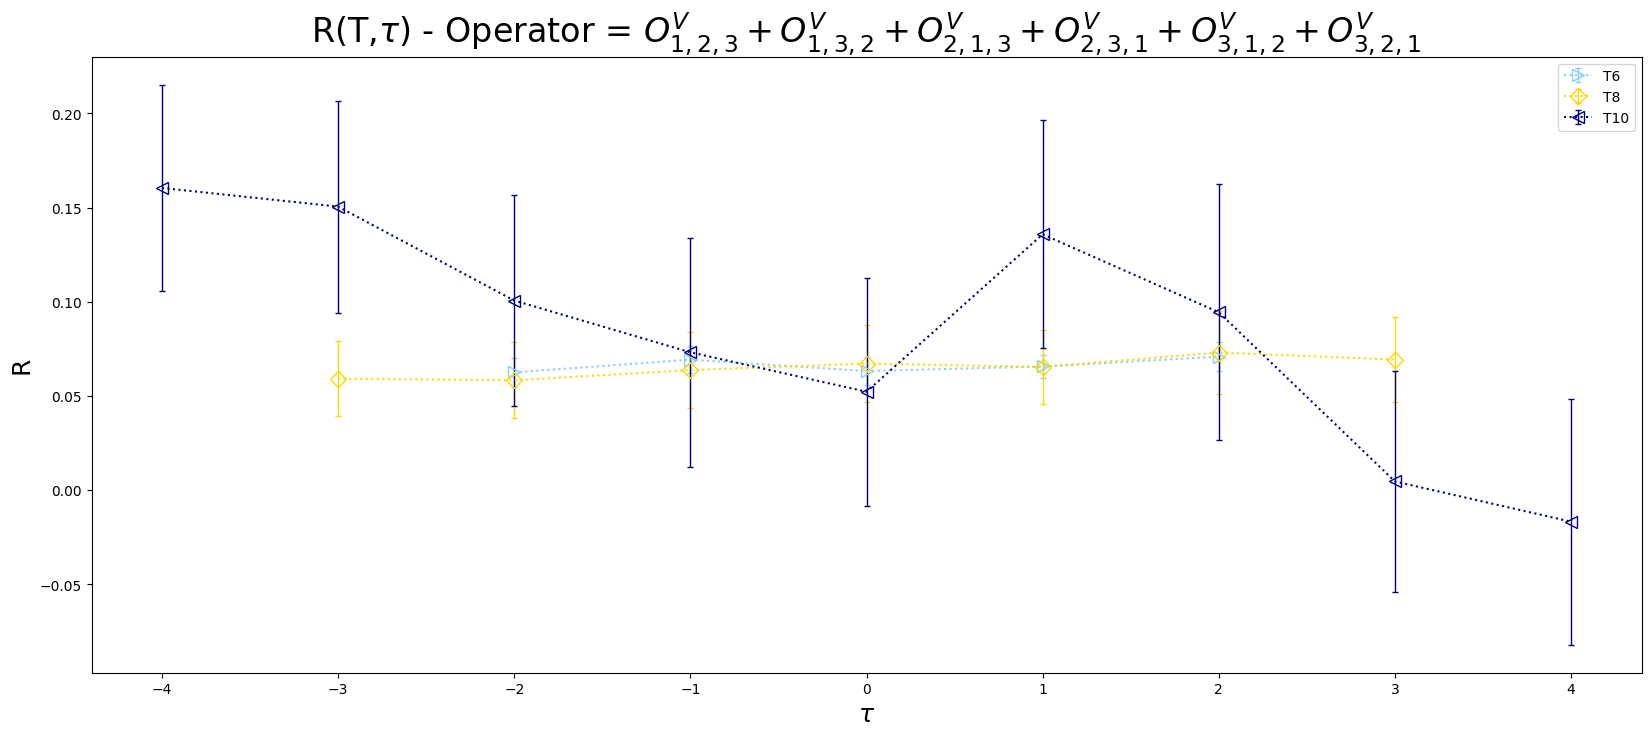

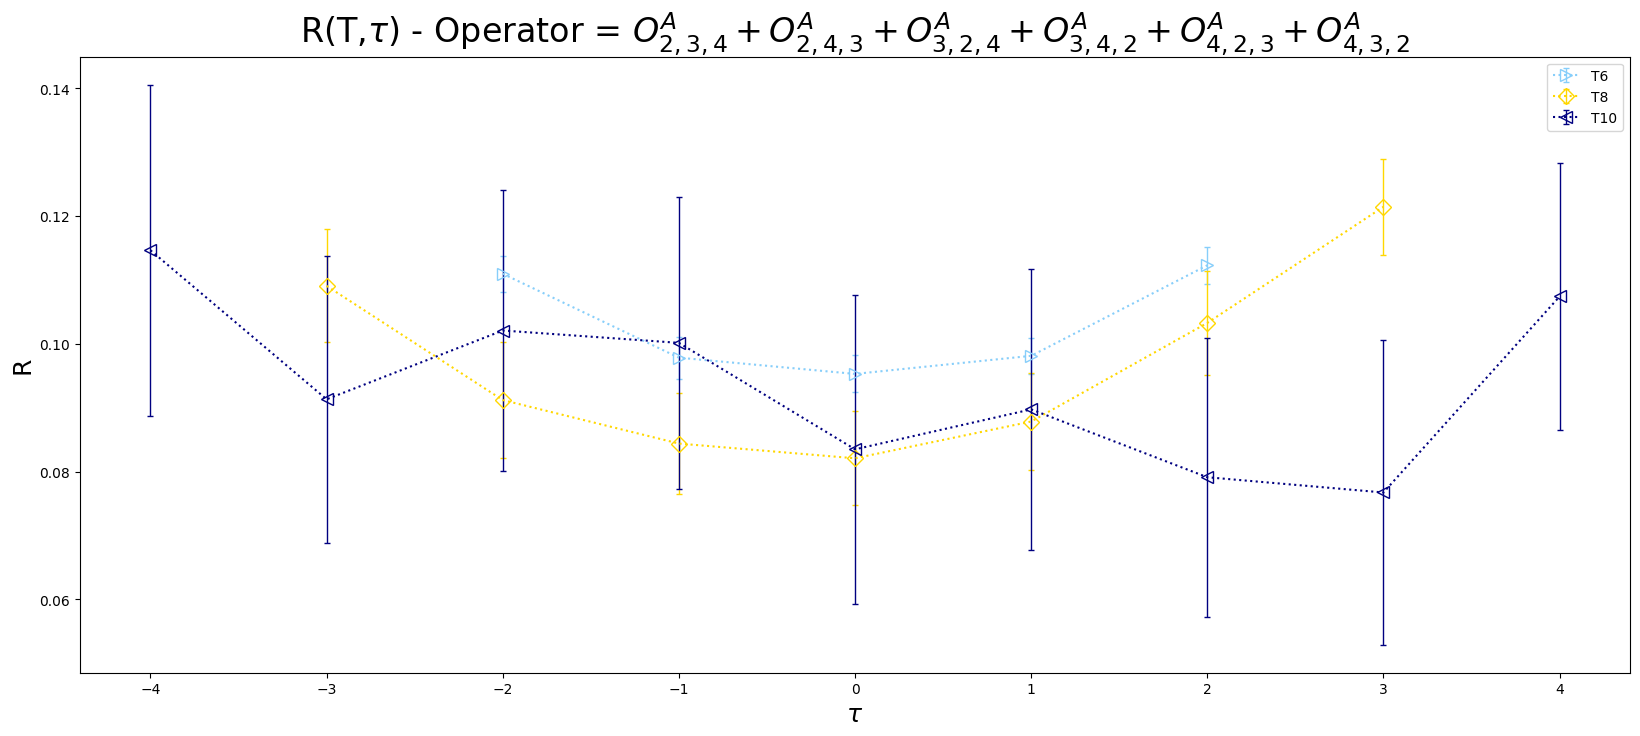

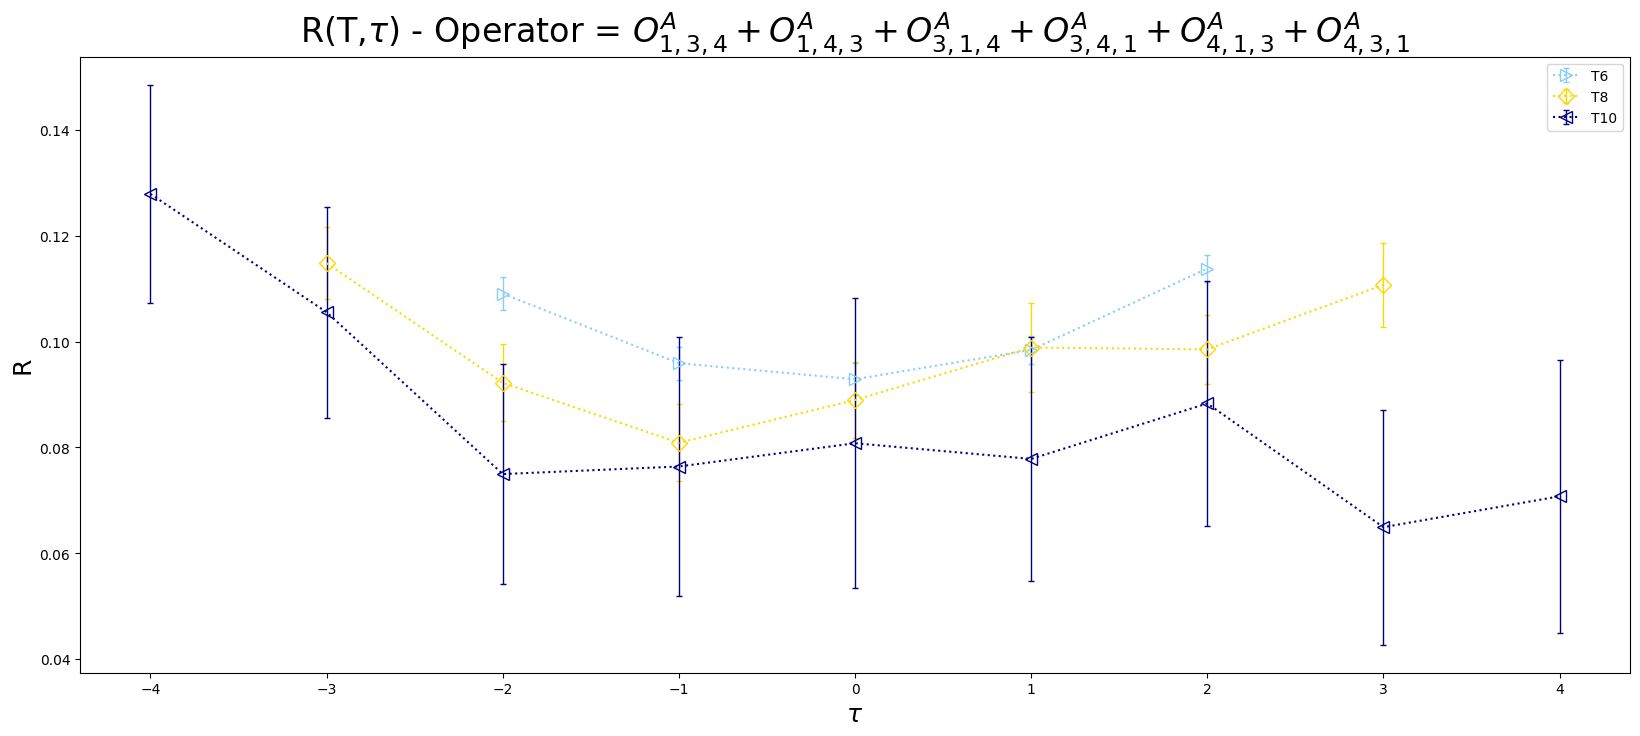

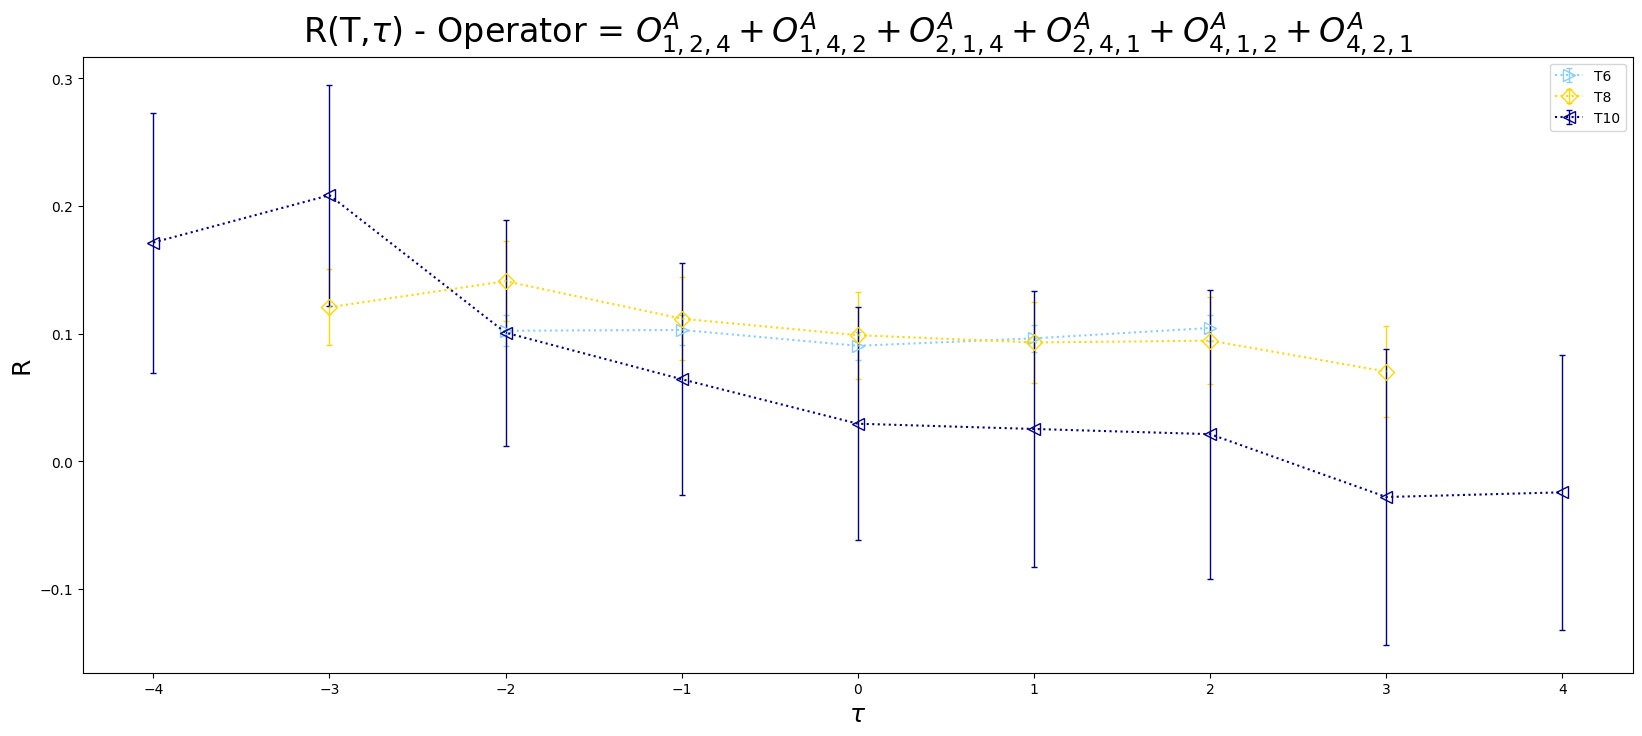

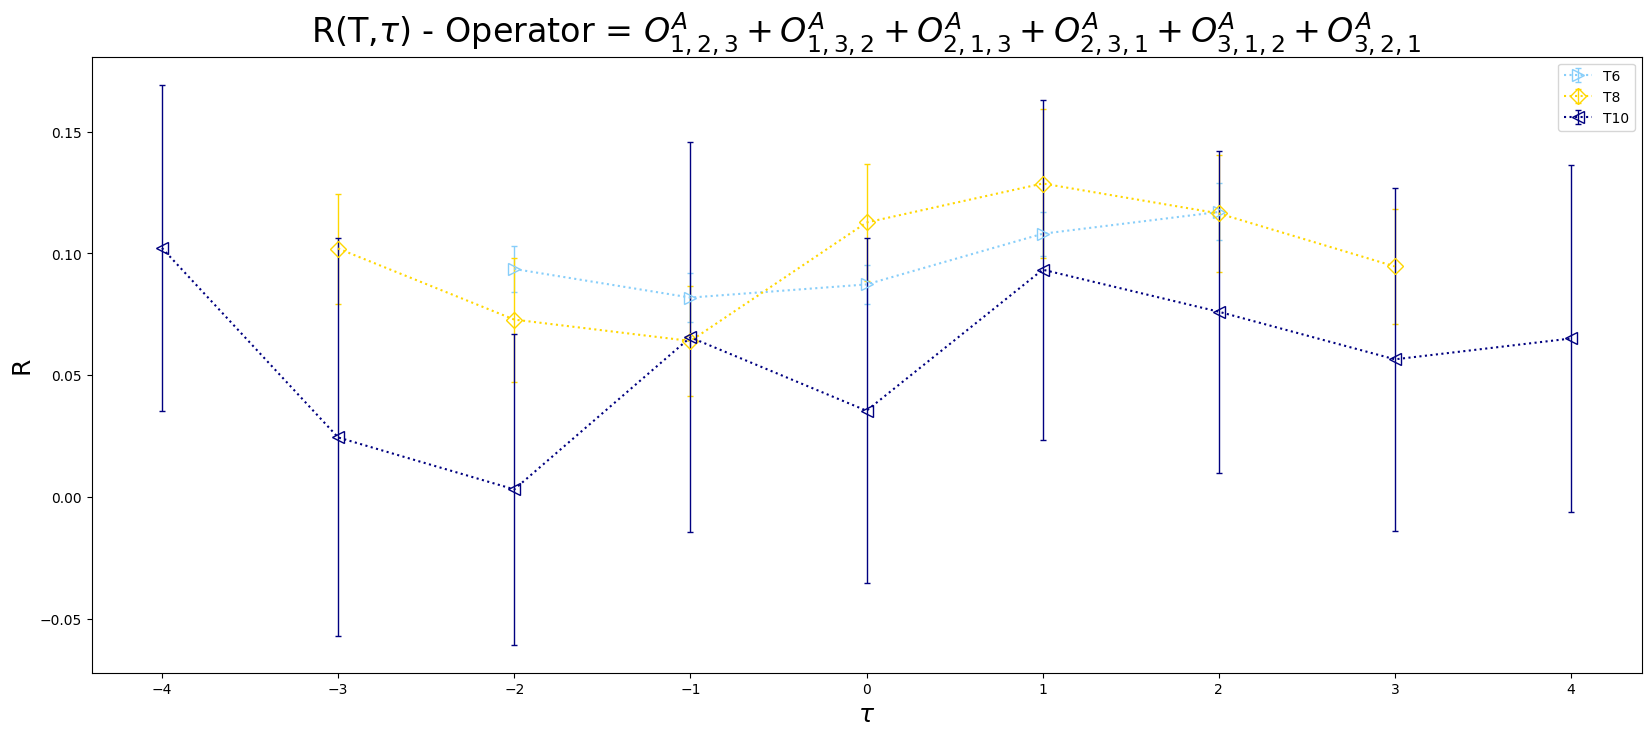

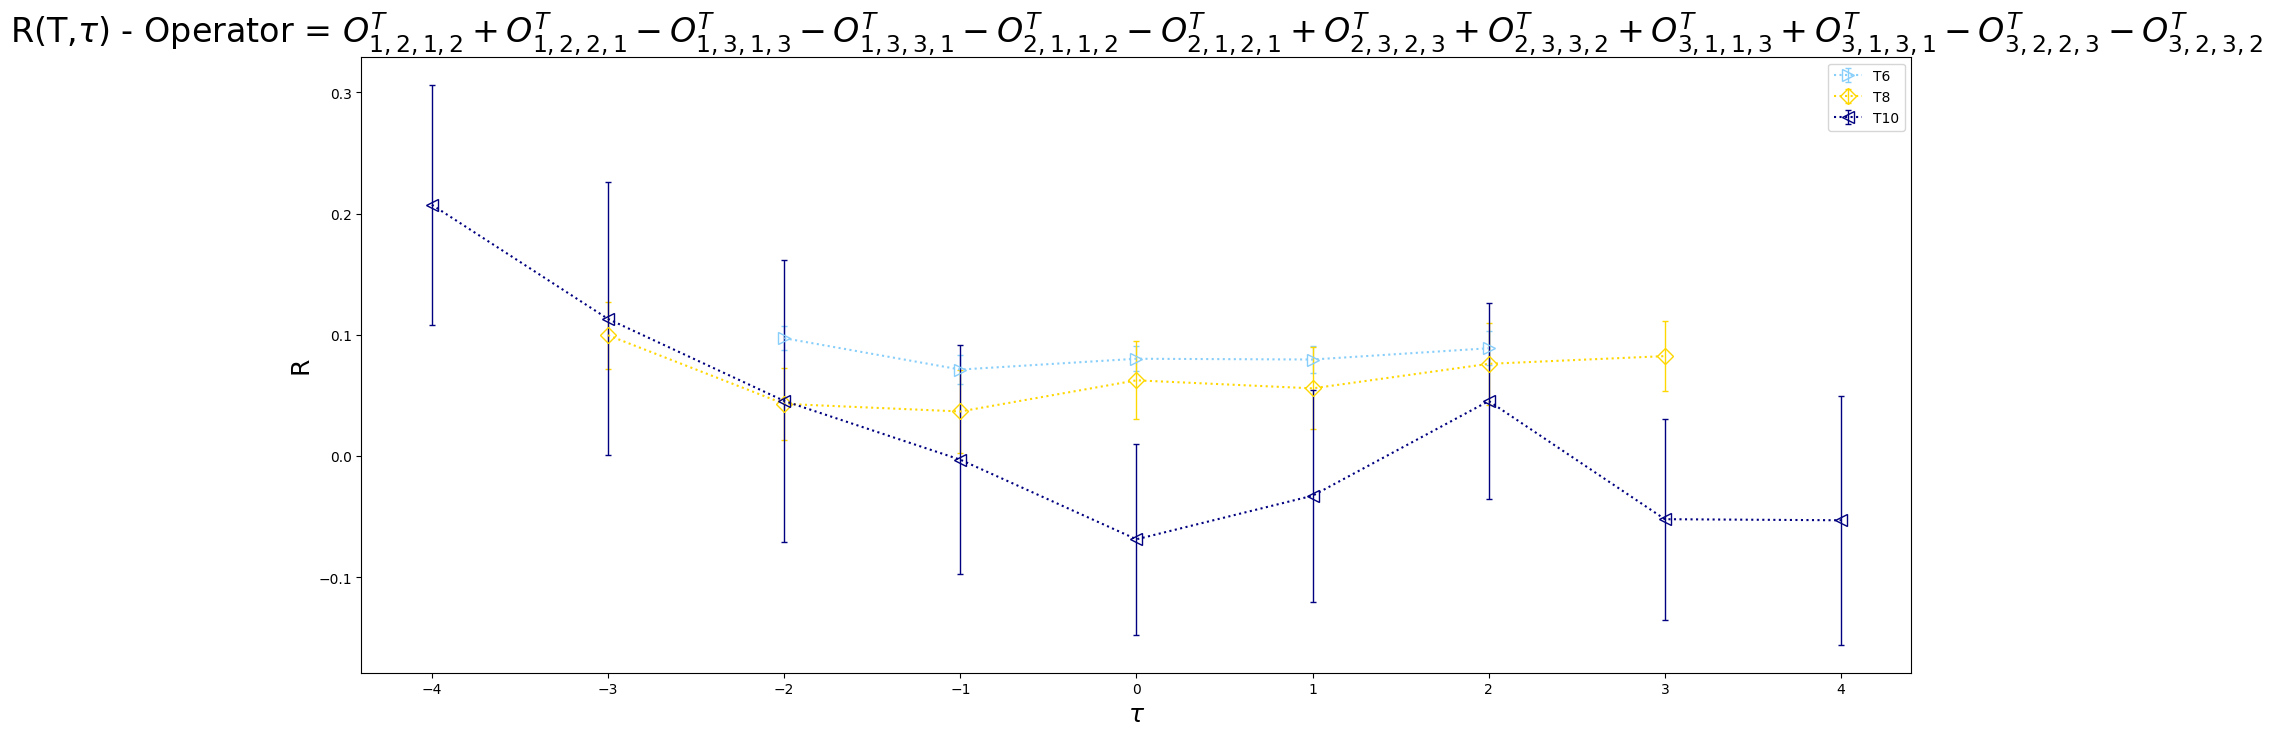

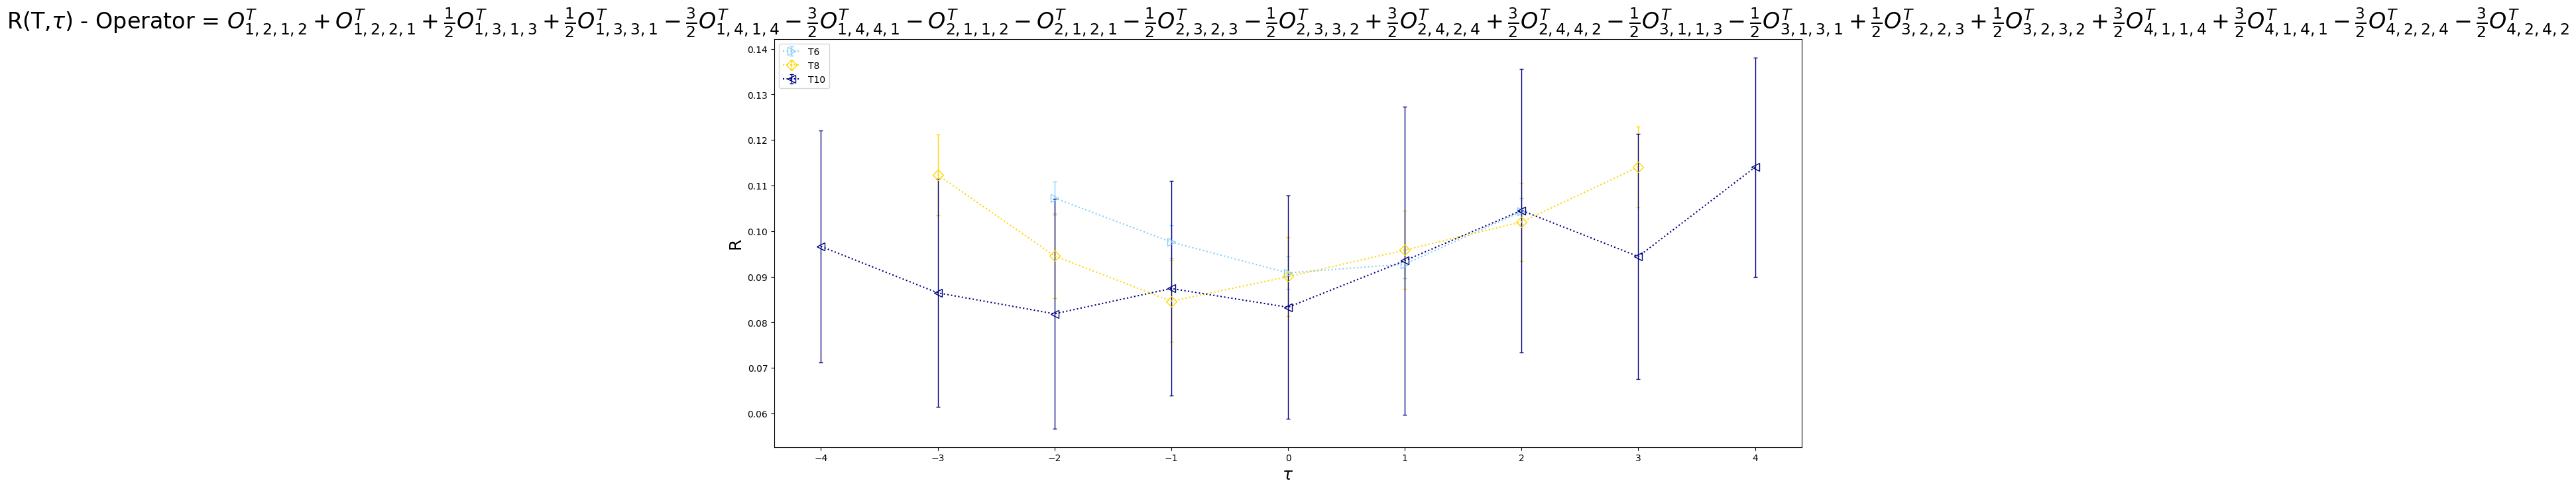

In [11]:
#opAnalyzer.remove_T(10,12)
_ = opAnalyzer.plot_R()

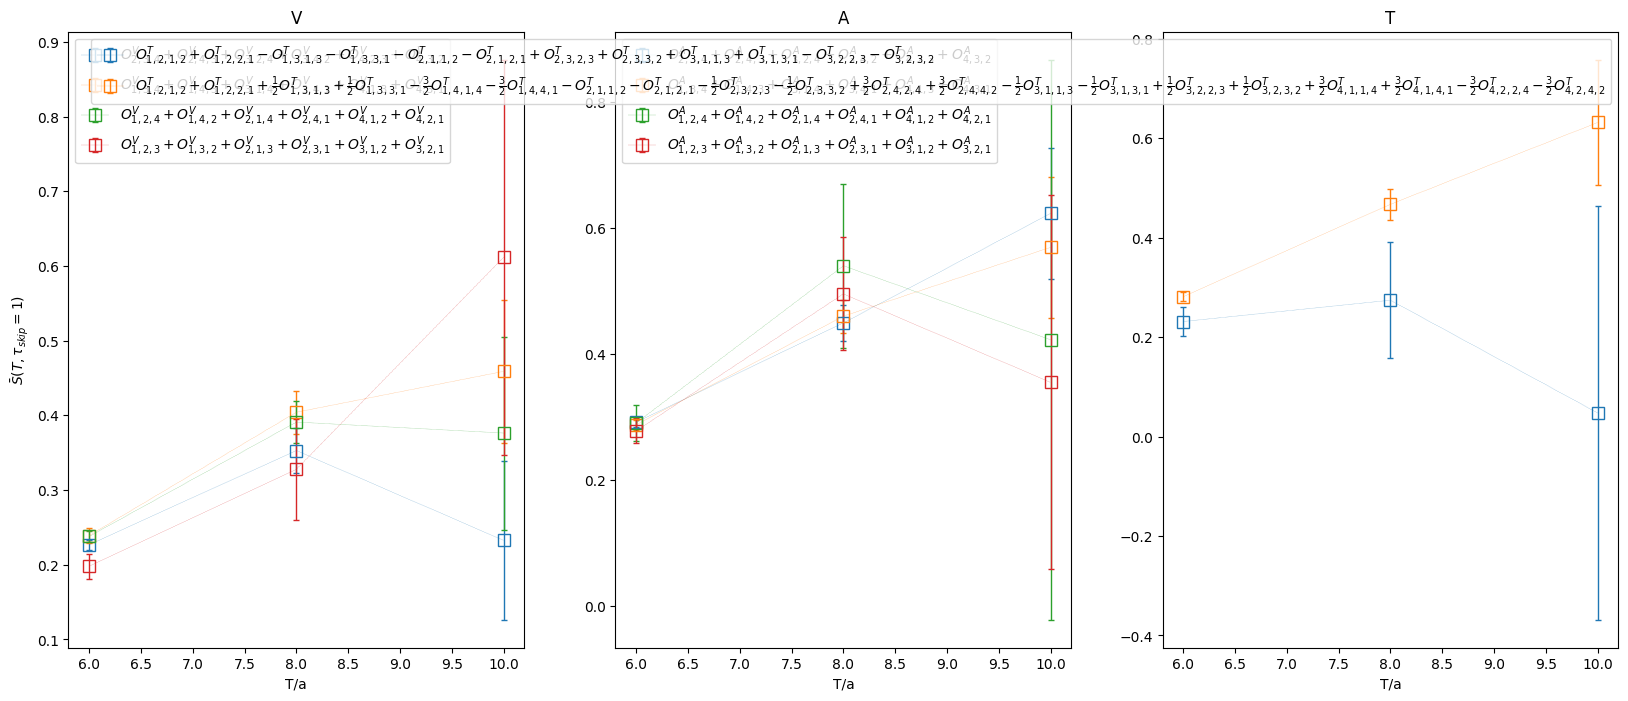

In [12]:
opAnalyzer.remove_T()
_ = opAnalyzer.plot_S(tskip=1)